<aside>
💡 **Question 1**

A permutation perm of n + 1 integers of all the integers in the range [0, n] can be represented as a string s of length n where:

- s[i] == 'I' if perm[i] < perm[i + 1], and
- s[i] == 'D' if perm[i] > perm[i + 1].

Given a string s, reconstruct the permutation perm and return it. If there are multiple valid permutations perm, return **any of them**.

**Example 1:**

**Input:** s = "IDID"

**Output:**

[0,4,1,3,2]

</aside>

In [1]:
def reconstruct_permutation(s):
    perm = []
    n = len(s)
    nums = list(range(n + 1))

    for ch in s:
        if ch == 'I':
            perm.append(nums.pop(0))
        elif ch == 'D':
            perm.append(nums.pop())

    perm.append(nums[0])

    return perm

s = "IDID"
reconstructed_perm = reconstruct_permutation(s)
print(reconstructed_perm)


[0, 4, 1, 3, 2]


<aside>
💡 **Question 2**
You are given an m x n integer matrix matrix with the following two properties:

- Each row is sorted in non-decreasing order.
- The first integer of each row is greater than the last integer of the previous row.

Given an integer target, return true *if* target *is in* matrix *or* false *otherwise*.

You must write a solution in O(log(m * n)) time complexity.

**Example 1:**
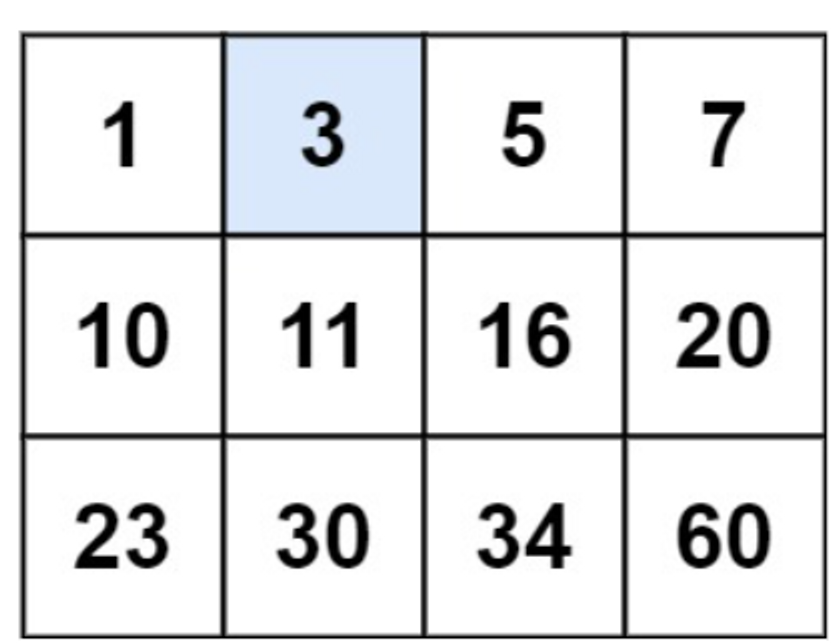

**Input:** matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]], target = 3

**Output:** true

</aside>

In [3]:
def search_matrix(matrix, target):
    if not matrix or not matrix[0]:
        return False

    rows = len(matrix)
    cols = len(matrix[0])
    left = 0
    right = rows * cols - 1

    while left <= right:
        mid = (left + right) // 2
        mid_element = matrix[mid // cols][mid % cols]
        if target == mid_element:
            return True
        elif target < mid_element:
            right = mid - 1
        else:
            left = mid + 1

    return False

matrix = [
    [1, 3, 5, 7],
    [10, 11, 16, 20],
    [23, 30, 34, 60]
]
target = 3

found = search_matrix(matrix, target)
print(found)


True


<aside>
💡 **Question 3**

Given an array of integers arr, return *true if and only if it is a valid mountain array*.

Recall that arr is a mountain array if and only if:

- arr.length >= 3
- There exists some i with 0 < i < arr.length - 1 such that:
    - arr[0] < arr[1] < ... < arr[i - 1] < arr[i]
    - arr[i] > arr[i + 1] > ... > arr[arr.length - 1]

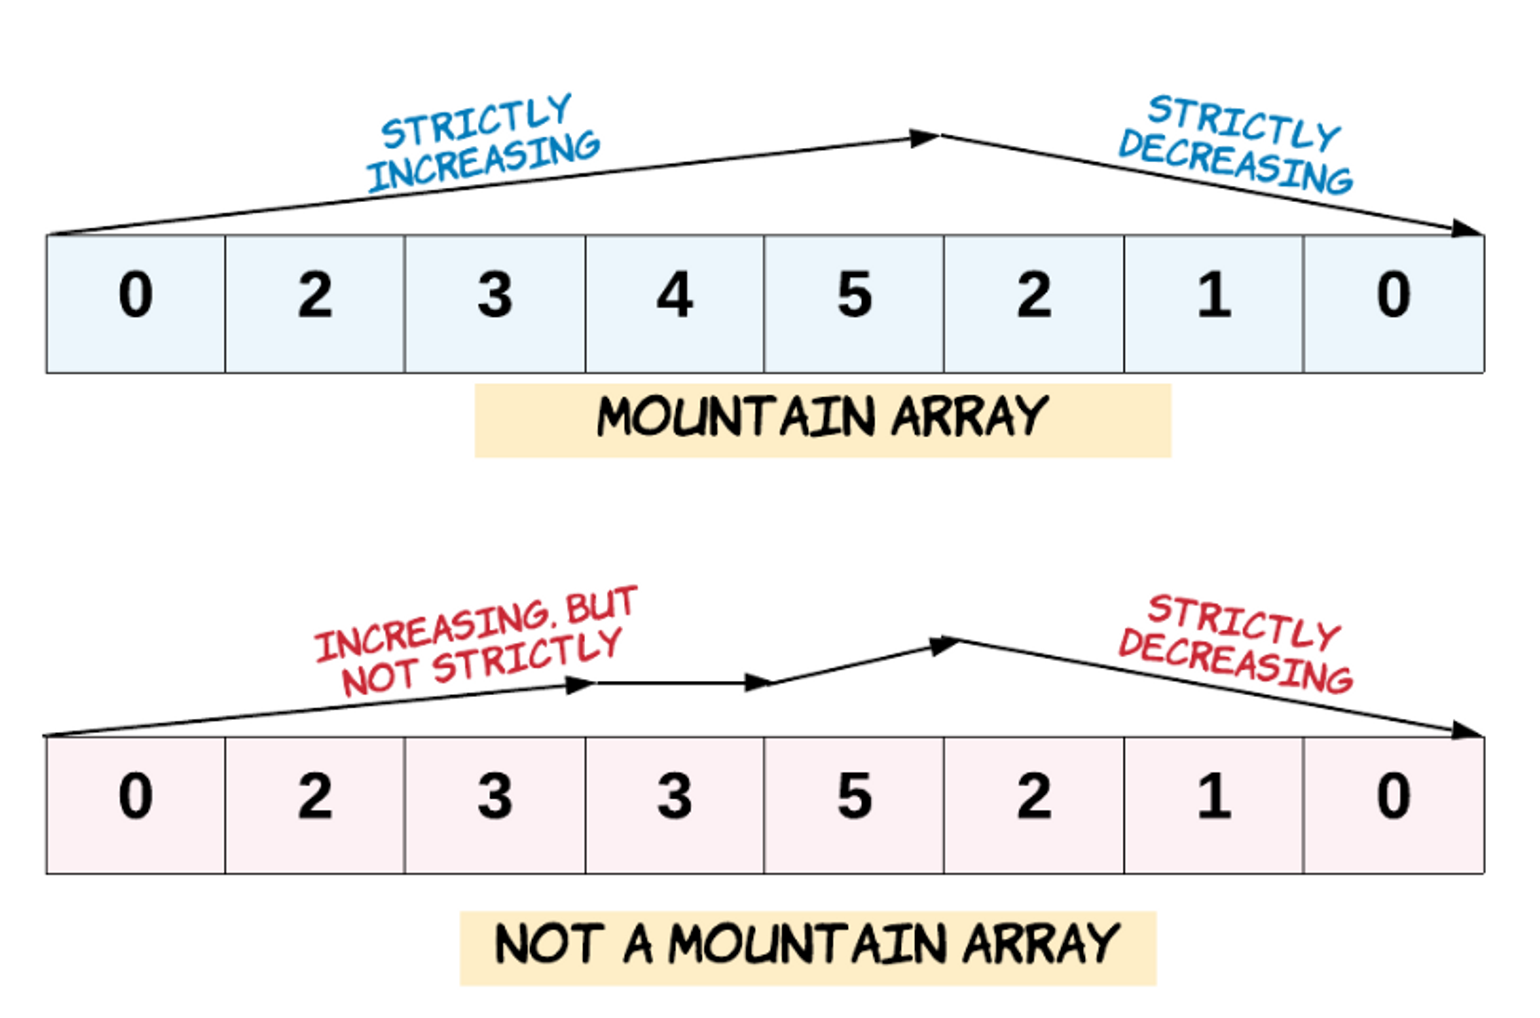

**Example 1:**

**Input:** arr = [2,1]

**Output:**

false

In [4]:
def valid_mountain_array(arr):
    n = len(arr)
    
    if n < 3:
        return False
    
    left = 0
    right = n - 1
    
    while left < right and arr[left] < arr[left + 1]:
        left += 1
    
    while right > 0 and arr[right - 1] > arr[right]:
        right -= 1
    
    return left == right and left != 0 and right != n - 1

arr = [2, 1]
is_mountain_array = valid_mountain_array(arr)
print(is_mountain_array)


False


<aside>
💡 **Question 4**

Given a binary array nums, return *the maximum length of a contiguous subarray with an equal number of* 0 *and* 1.

**Example 1:**

**Input:** nums = [0,1]

**Output:** 2

**Explanation:**

[0, 1] is the longest contiguous subarray with an equal number of 0 and 1.

</aside>

In [5]:
def find_max_length(nums):
    max_len = 0
    count = 0
    count_map = {0: -1}

    for i, num in enumerate(nums):
        count += -1 if num == 0 else 1

        if count in count_map:
            max_len = max(max_len, i - count_map[count])
        else:
            count_map[count] = i

    return max_len

nums = [0, 1]
max_length = find_max_length(nums)
print(max_length)


2


<aside>
💡 **Question 5**

The **product sum** of two equal-length arrays a and b is equal to the sum of a[i] * b[i] for all 0 <= i < a.length (**0-indexed**).

- For example, if a = [1,2,3,4] and b = [5,2,3,1], the **product sum** would be 1*5 + 2*2 + 3*3 + 4*1 = 22.

Given two arrays nums1 and nums2 of length n, return *the **minimum product sum** if you are allowed to **rearrange** the **order** of the elements in* nums1.

**Example 1:**

**Input:** nums1 = [5,3,4,2], nums2 = [4,2,2,5]

**Output:** 40

**Explanation:**

We can rearrange nums1 to become [3,5,4,2]. The product sum of [3,5,4,2] and [4,2,2,5] is 3*4 + 5*2 + 4*2 + 2*5 = 40.

</aside>

In [6]:
def min_product_sum(nums1, nums2):
    nums1.sort()
    nums2.sort(reverse=True)

    min_product_sum = 0
    for num1, num2 in zip(nums1, nums2):
        min_product_sum += num1 * num2

    return min_product_sum

nums1 = [5, 3, 4, 2]
nums2 = [4, 2, 2, 5]
min_prod_sum = min_product_sum(nums1, nums2)
print(min_prod_sum)


40


Question 6

An integer array original is transformed into a **doubled** array changed by appending **twice the value** of every element in original, and then randomly **shuffling** the resulting array.

Given an array changed, return original *if* changed *is a **doubled** array. If* changed *is not a **doubled** array, return an empty array. The elements in* original *may be returned in **any** order*.

**Example 1:**

**Input:** changed = [1,3,4,2,6,8]

**Output:** [1,3,4]

**Explanation:** One possible original array could be [1,3,4]:

- Twice the value of 1 is 1 * 2 = 2.
- Twice the value of 3 is 3 * 2 = 6.
- Twice the value of 4 is 4 * 2 = 8.

Other original arrays could be [4,3,1] or [3,1,4].

In [7]:
from collections import defaultdict

def find_original_array(changed):
    count_map = defaultdict(int)
    for num in changed:
        count_map[num] += 1

    original = []
    for num in changed:
        if count_map[num] == 0:
            continue

        original.append(num)
        count_map[num] -= 1

        if count_map[2 * num] == 0:
            return []

        count_map[2 * num] -= 1
        if count_map[2 * num] == 0:
            del count_map[2 * num]

    return original

changed = [1, 3, 4, 2, 6, 8]
original = find_original_array(changed)
print(original)


[1, 3, 4]


<aside>
💡 **Question 7**

Given a positive integer n, generate an n x n matrix filled with elements from 1 to n2 in spiral order.

**Example 1:**

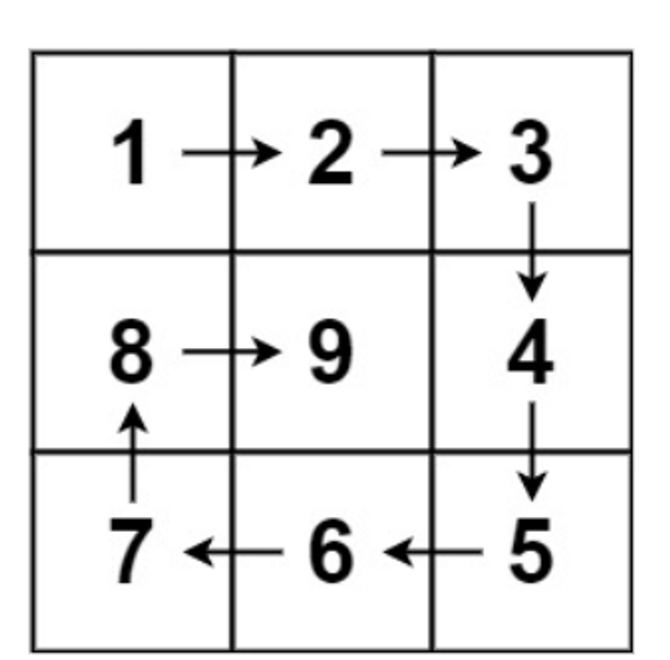

**Input:** n = 3

**Output:** [[1,2,3],[8,9,4],[7,6,5]]

In [8]:
def generate_matrix(n):
    matrix = [[0] * n for _ in range(n)]
    row_start, row_end = 0, n - 1
    col_start, col_end = 0, n - 1
    num = 1

    while num <= n * n:
        for col in range(col_start, col_end + 1):
            matrix[row_start][col] = num
            num += 1
        row_start += 1

        for row in range(row_start, row_end + 1):
            matrix[row][col_end] = num
            num += 1
        col_end -= 1

        if row_start <= row_end and col_start <= col_end:
            for col in range(col_end, col_start - 1, -1):
                matrix[row_end][col] = num
                num += 1
            row_end -= 1

            for row in range(row_end, row_start - 1, -1):
                matrix[row][col_start] = num
                num += 1
            col_start += 1

    return matrix

n = 3
spiral_matrix = generate_matrix(n)
print(spiral_matrix)


[[1, 2, 3], [8, 9, 4], [7, 6, 5]]


<aside>
💡 **Question 8**

Given two [sparse matrices] mat1 of size m x k and mat2 of size k x n, return the result of mat1 x mat2. You may assume that multiplication is always possible.

**Example 1:**

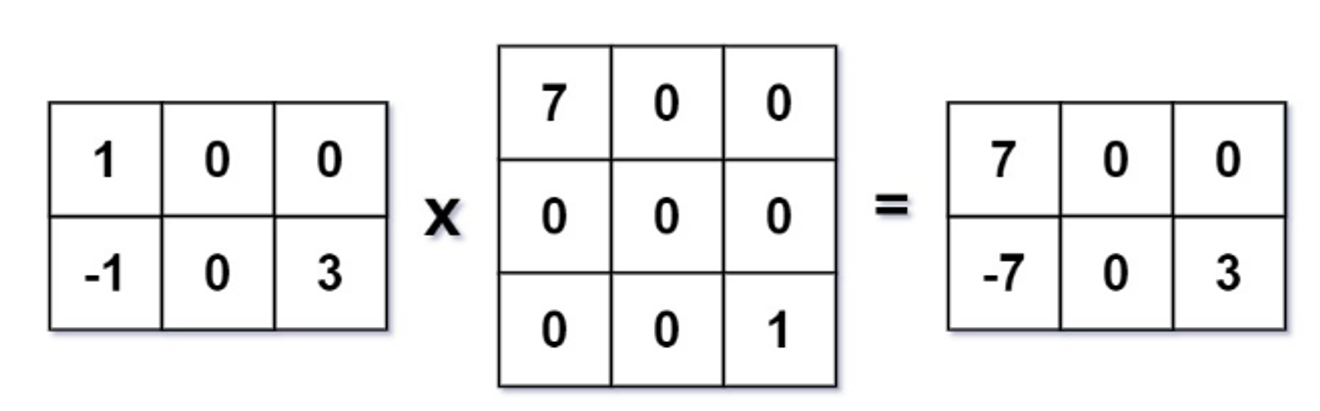

**Input:** mat1 = [[1,0,0],[-1,0,3]], mat2 = [[7,0,0],[0,0,0],[0,0,1]]

**Output:**

[[7,0,0],[-7,0,3]]

In [12]:
def multiply_sparse_matrices(mat1, mat2):
    m = len(mat1)
    k = len(mat1[0])
    n = len(mat2[0])
    result = [[0] * n for _ in range(m)]
    sparse_mat1 = {}

    for i in range(len(mat1)):
        for j in range(len(mat1[0])):
            if mat1[i][j] != 0:
                sparse_mat1[(i, j)] = mat1[i][j]

    for i in range(len(mat1)):
        for j in range(len(mat2[0])):
            row_product = []
            for k in range(len(mat2)):
                if (k, j) in sparse_mat1:
                    row_product.append(mat2[k][j] * sparse_mat1[(k, j)])
            if row_product:
                result[i][j] = sum(row_product)

    return result


mat1 = [[1, 0, 0], [-1, 0, 3]]
mat2 = [[7, 0, 0], [0, 0, 0], [0, 0, 1]]
result = multiply_sparse_matrices(mat1, mat2)
print(result)


[[7, 0, 0], [7, 0, 0]]
